In [62]:
from __future__ import print_function
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [63]:
def alignImages_SIFT(im1, im2):
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    orb = cv2.SIFT_create()
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

    # Match features.
    matcher = cv2.BFMatcher()
    matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append([m])

    # Draw good matches
    imMatches = cv2.drawMatchesKnn(im1, keypoints1, im2, keypoints2, good, None)

    return imMatches

In [64]:
refFilename = "ace_heart.png"
imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)
# imReference = cv2.resize(imReference,(0,0),fx=0.5,fy=0.5)

imFilename = "bai.jpg"
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im = cv2.resize(im,(0,0),fx=0.5,fy=0.5)
print(imReference.shape)
print(im.shape) 

imMatches = alignImages_SIFT(im, imReference)

(849, 611, 3)
(1500, 1500, 3)


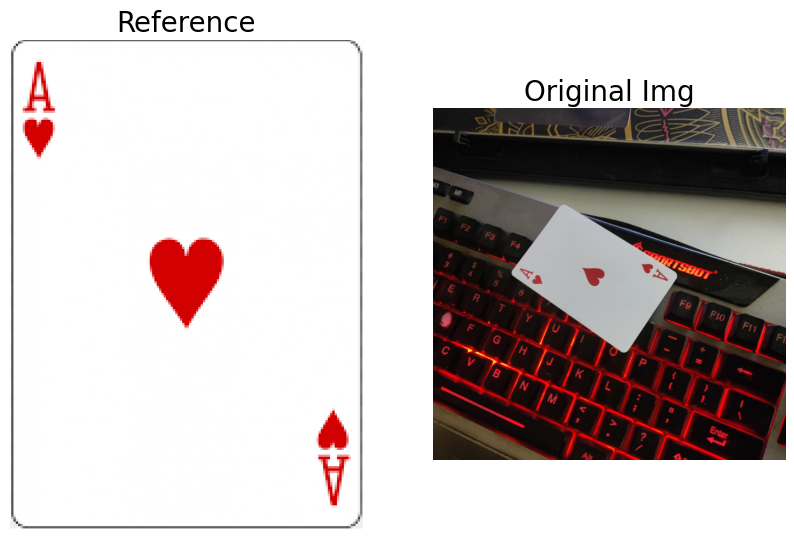

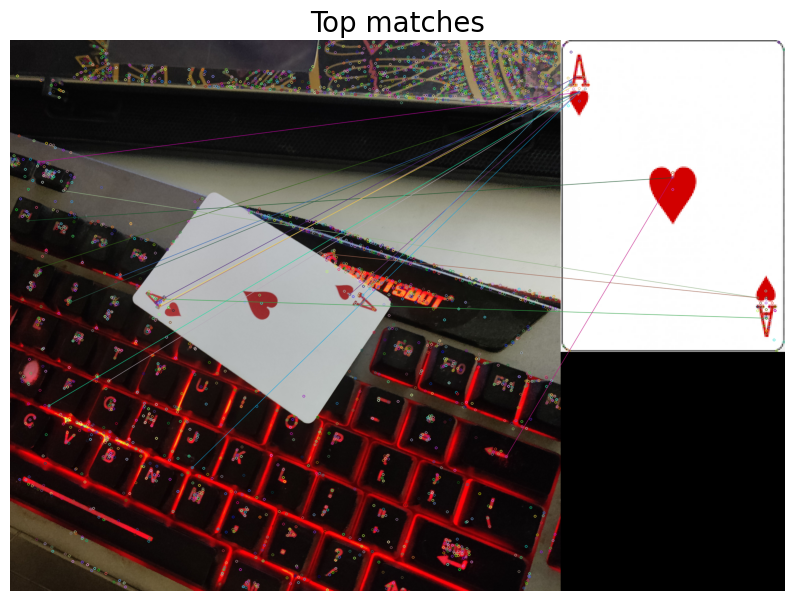

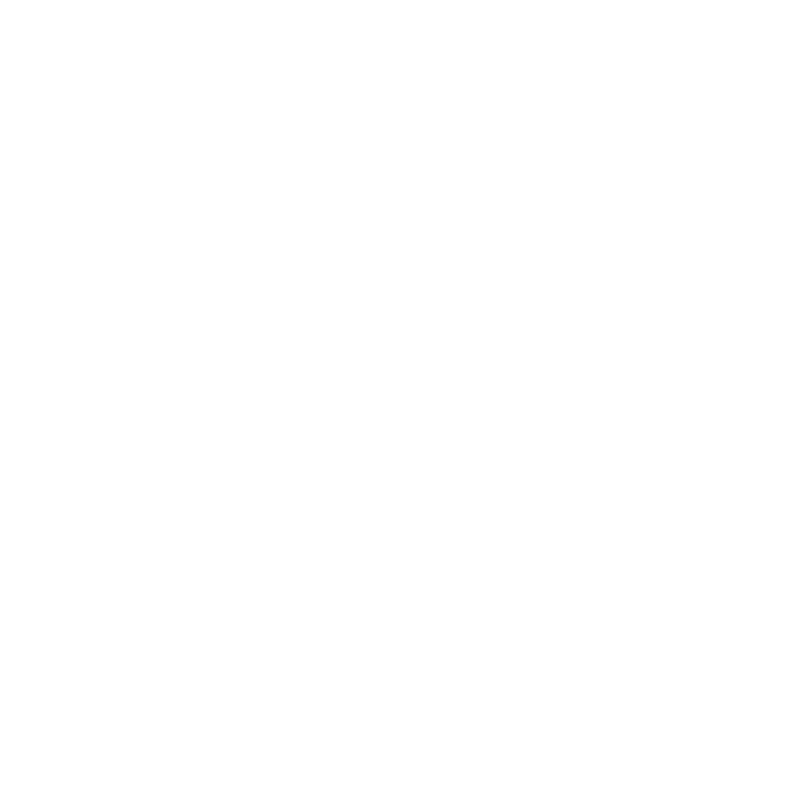

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10, 20))
fig2, axes2 = plt.subplots(1, 1, figsize=(10, 20))
fig3, axes3 = plt.subplots(1, 1, figsize=(10, 10))

for i in range(2):
        axes[i].axis('off')
axes2.axis('off')
axes3.axis('off')

axes[0].imshow(imReference[:,:,::-1])
axes[0].set_title('Reference', fontsize=20)

axes[1].imshow(im[:,:,::-1])
axes[1].set_title('Original Img', fontsize=20)

axes2.imshow(imMatches[:,:,::-1])
axes2.set_title('Top matches', fontsize=20)

# axes3.imshow(imReg[:,:,::-1])
# axes3.set_title('Aligned Img', fontsize=20)

plt.show()